## 計算300-IOU

取處理前的Mask

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

# 輸入資料夾路徑
input_folder = r'C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img'

# 輸出資料夾路徑
output_folder = r'C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth'

# 如果輸出資料夾不存在，則創建
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 瀏覽資料夾中的每張圖片
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # 可以根據需要添加其他圖片格式
        # 完整圖片路徑
        img_path = os.path.join(input_folder, filename)
        
        # 讀取圖片
        image = cv2.imread(img_path)
        
        # 檢查是否成功讀取圖片
        if image is None:
            print(f"無法讀取圖片: {filename}")
            continue
        
        # 將圖片轉換為灰度圖
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # 使用Otsu's方法進行二值化處理
        _, binary_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # 生成新的檔名
        new_filename = os.path.splitext(filename)[0] + "_Mask" + os.path.splitext(filename)[1]
        
        # 保存二值化圖片到輸出資料夾
        output_path = os.path.join(output_folder, new_filename)
        cv2.imwrite(output_path, binary_mask)
        print(f"已處理並保存圖片: {output_path}")

已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_251_Mask.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_252_Mask.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_253_Mask.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_254_Mask.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_255_Mask.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_256_Mask.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_257_Mask.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_258_Mask.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_259_Mask.png
已處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth\detect_260_Mask.png


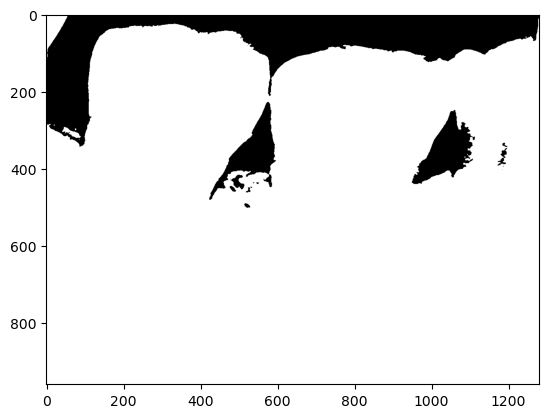

In [2]:
def show_img_by_path(img_path):
    test_img=cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()
show_img_by_path(r'C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_img_output\detect_251_Mask.png')

計算處理前的IOU

detect_251_Mask.png 與 mix_1.png 的最佳閾值為 0，IoU 為 0.9251291328848774
detect_252_Mask.png 與 mix_2.png 的最佳閾值為 0，IoU 為 0.796260165376382
detect_253_Mask.png 與 mix_3.png 的最佳閾值為 0，IoU 為 0.7824903890385753
detect_254_Mask.png 與 mix_4.png 的最佳閾值為 0，IoU 為 0.8491098159771518
detect_255_Mask.png 與 mix_5.png 的最佳閾值為 0，IoU 為 0.7804830906889357
detect_256_Mask.png 與 mix_6.png 的最佳閾值為 0，IoU 為 0.7441788217321456
detect_257_Mask.png 與 mix_7.png 的最佳閾值為 0，IoU 為 0.8264848796460892
detect_258_Mask.png 與 mix_8.png 的最佳閾值為 0，IoU 為 0.7590175565891297
detect_259_Mask.png 與 mix_9.png 的最佳閾值為 0，IoU 為 0.8103872372656694
detect_260_Mask.png 與 mix_10.png 的最佳閾值為 0，IoU 為 0.8410626708056412


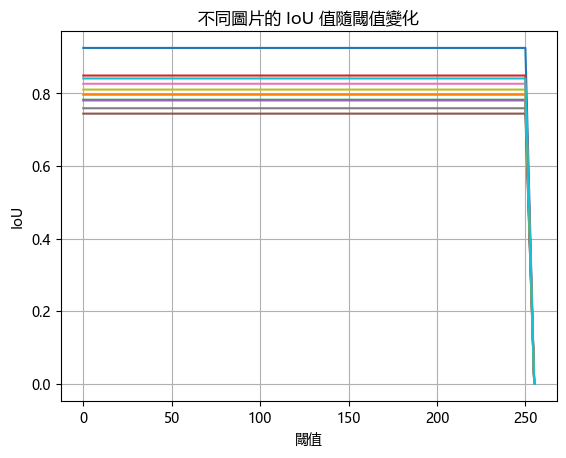

檔案: detect_251_Mask.png vs mix_1.png
最佳閾值: 0
最佳 IoU: 0.9251291328848774

檔案: detect_252_Mask.png vs mix_2.png
最佳閾值: 0
最佳 IoU: 0.796260165376382

檔案: detect_253_Mask.png vs mix_3.png
最佳閾值: 0
最佳 IoU: 0.7824903890385753

檔案: detect_254_Mask.png vs mix_4.png
最佳閾值: 0
最佳 IoU: 0.8491098159771518

檔案: detect_255_Mask.png vs mix_5.png
最佳閾值: 0
最佳 IoU: 0.7804830906889357

檔案: detect_256_Mask.png vs mix_6.png
最佳閾值: 0
最佳 IoU: 0.7441788217321456

檔案: detect_257_Mask.png vs mix_7.png
最佳閾值: 0
最佳 IoU: 0.8264848796460892

檔案: detect_258_Mask.png vs mix_8.png
最佳閾值: 0
最佳 IoU: 0.7590175565891297

檔案: detect_259_Mask.png vs mix_9.png
最佳閾值: 0
最佳 IoU: 0.8103872372656694

檔案: detect_260_Mask.png vs mix_10.png
最佳閾值: 0
最佳 IoU: 0.8410626708056412

全部圖片的平均 IoU: 0.8114603760004598


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted

def calculate_iou(mask1, mask2):
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def find_best_threshold(mask_predict, mask_groundtruth):
    best_iou = 0
    best_threshold = 127  # 預設初始閾值
    ious = []

    # 測試不同閾值範圍 0-255
    for threshold in range(0, 256, 5):
        # 二值化處理
        _, mask_predict_bin = cv2.threshold(mask_predict, threshold, 255, cv2.THRESH_BINARY)
        _, mask_groundtruth_bin = cv2.threshold(mask_groundtruth, threshold, 255, cv2.THRESH_BINARY)
        
        # 計算 IoU
        iou = calculate_iou(mask_predict_bin, mask_groundtruth_bin)
        ious.append((threshold, iou))
        
        # 更新最佳閾值
        if iou > best_iou:
            best_iou = iou
            best_threshold = threshold

    return best_threshold, best_iou, ious

def process_folder_for_best_thresholds(predict_folder, groundtruth_folder):
    # 自然排序讀取檔案
    predict_files = natsorted([f for f in os.listdir(predict_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    # 檢查檔案數量是否一致
    if len(predict_files) != len(groundtruth_files):
        raise ValueError("預測資料夾和真實資料夾中的檔案數量不一致。")

    best_thresholds = []
    total_iou = 0
    for predict_file, groundtruth_file in zip(predict_files, groundtruth_files):
        predict_path = os.path.join(predict_folder, predict_file)
        groundtruth_path = os.path.join(groundtruth_folder, groundtruth_file)
        
        # 讀取並轉換為灰階影像
        mask_predict = cv2.imread(predict_path, cv2.IMREAD_GRAYSCALE)
        mask_groundtruth = cv2.imread(groundtruth_path, cv2.IMREAD_GRAYSCALE)
        
        if mask_predict is None or mask_groundtruth is None:
            print(f"無法讀取檔案: {predict_path} 或 {groundtruth_path}")
            continue
        
        # 計算最佳閾值和 IoU
        best_threshold, best_iou, ious = find_best_threshold(mask_predict, mask_groundtruth)
        best_thresholds.append((predict_file, groundtruth_file, best_threshold, best_iou))
        
        print(f"{predict_file} 與 {groundtruth_file} 的最佳閾值為 {best_threshold}，IoU 為 {best_iou}")

        # 累加 IoU 值
        total_iou += best_iou

        # 畫出每個檔案的 IoU-閾值變化圖
        thresholds = [x[0] for x in ious]
        ious_values = [x[1] for x in ious]
        plt.plot(thresholds, ious_values, label=f"{predict_file}")
    
    # 計算平均 IoU
    average_iou = total_iou / len(best_thresholds) if best_thresholds else 0

    # 顯示所有檔案的 IoU-閾值圖
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 設定中文字體
    plt.xlabel('閾值')
    plt.ylabel('IoU')
    plt.title('不同圖片的 IoU 值隨閾值變化')
    #plt.legend(loc="best")  # 顯示圖例
    plt.grid(True)
    plt.show()

    return best_thresholds, average_iou

# 預測集和真實集的資料夾路徑
predict_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict"
groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth"

# 計算每張圖片的最佳閾值和 IoU，並計算平均 IoU
best_thresholds, average_iou = process_folder_for_best_thresholds(predict_folder, groundtruth_folder)

# 輸出每對檔案的最佳閾值和 IoU
for predict_file, groundtruth_file, best_threshold, best_iou in best_thresholds:
    print(f"檔案: {predict_file} vs {groundtruth_file}")
    print(f"最佳閾值: {best_threshold}")
    print(f"最佳 IoU: {best_iou}\n")

# 輸出全部圖片的平均 IoU
print(f"全部圖片的平均 IoU: {average_iou}")


後處理

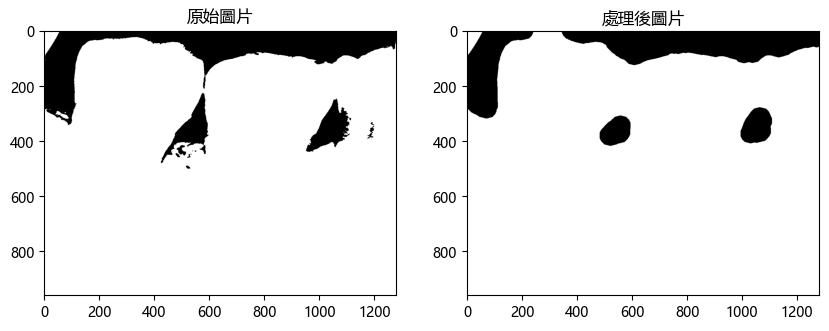

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_251_Mask.png


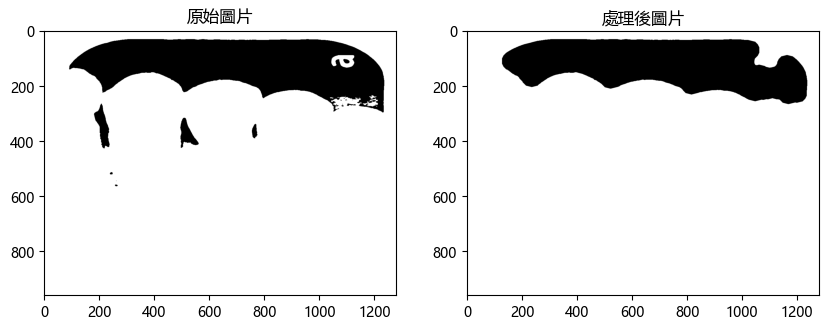

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_252_Mask.png


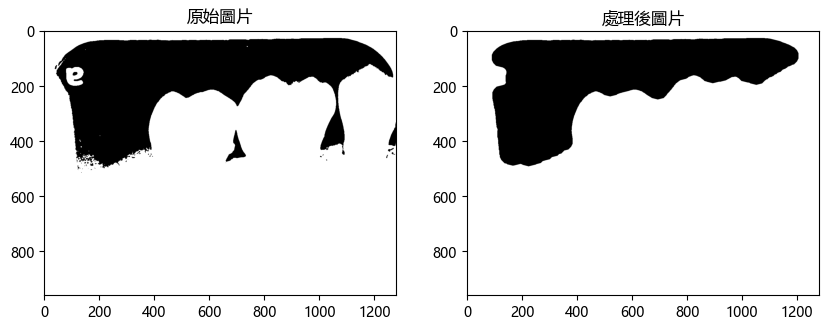

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_253_Mask.png


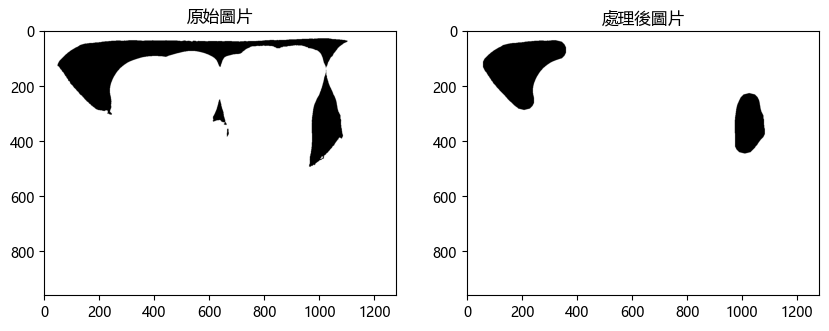

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_254_Mask.png


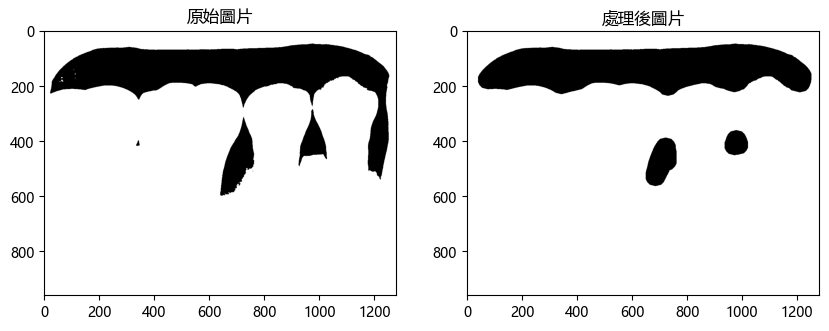

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_255_Mask.png


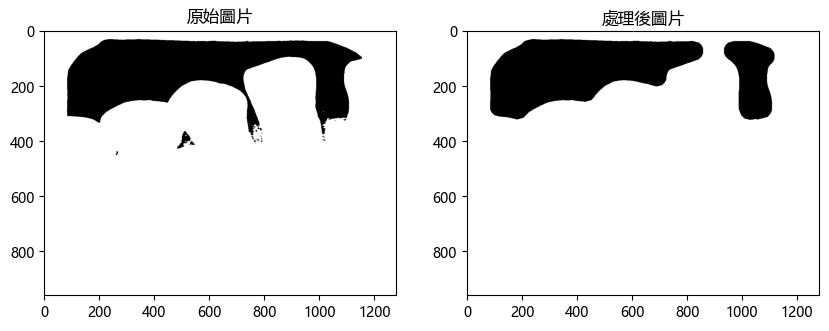

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_256_Mask.png


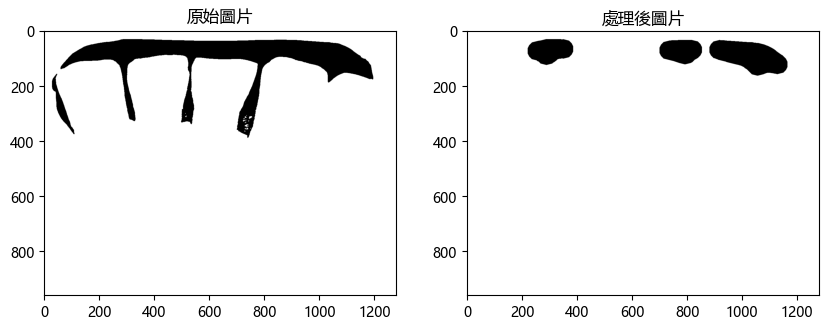

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_257_Mask.png


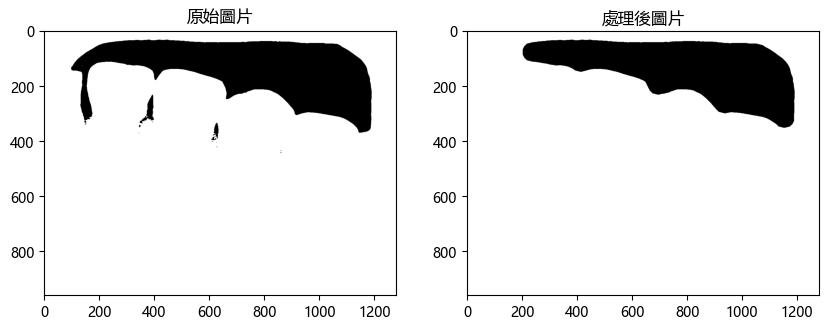

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_258_Mask.png


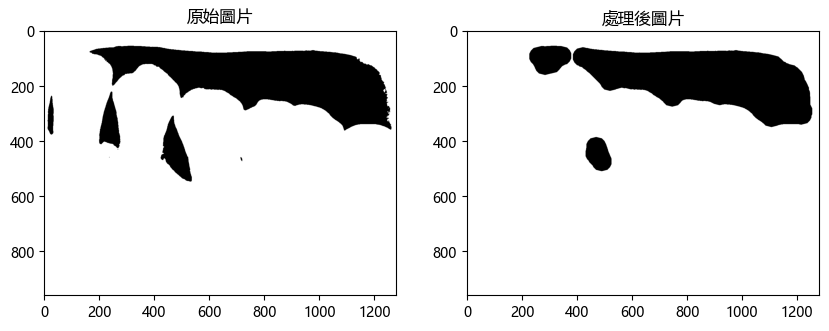

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_259_Mask.png


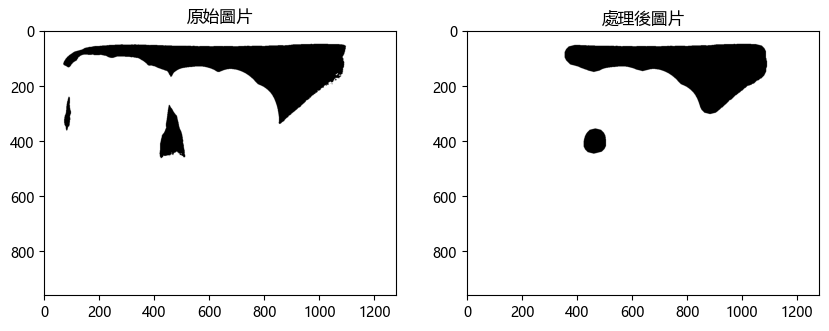

處理完成並保存至: C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2\detect_260_Mask.png
所有圖片處理完成。


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted

def process_image(image, kernel_shape='ellipse', kernel_size=10, iterations=1, flood_fill=False, flood_fill_seed_point=None):
    """
    對單張圖片進行開運算和閉運算處理，並選擇性地應用洪水填充以填補孔洞。
    :param image: 原始灰階圖片
    :param kernel_shape: 結構元素的形狀 ('rect', 'ellipse', 'circle')
    :param kernel_size: 閉運算的內核大小，數值越大，閉運算效果越強
    :param iterations: 閉運算的迭代次數
    :param flood_fill: 是否應用洪水填充
    :param flood_fill_seed_point: 洪水填充的起始點 (x, y)
    :return: 經過處理後的圖片
    """
    
    # 定義結構元素的形狀
    if kernel_shape == 'rect':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)  # 矩形內核
    elif kernel_shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))  # 橢圓內核
    elif kernel_shape == 'circle':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))  # 圓形內核
    else:
        raise ValueError("不支持的結構元素形狀")

    # 使用開運算去除噪點
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # 再進行閉運算填補孔洞
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    # 洪水填充處理
    if flood_fill:
        # 創建填充的掩膜，大小需比圖片多兩個像素
        h, w = closing.shape[:2]
        mask = np.zeros((h + 2, w + 2), np.uint8)
        
        # 若未提供起始點，預設使用圖片中心點
        if flood_fill_seed_point is None:
            flood_fill_seed_point = (w // 2, h // 2)
        
        # 設置洪水填充參數 (填充顏色和閾值)
        fill_color = 255  # 填充白色
        lo_diff = 10  # 顏色的最小差異
        up_diff = 10  # 顏色的最大差異

        # 執行洪水填充
        cv2.floodFill(closing, mask, flood_fill_seed_point, fill_color, loDiff=lo_diff, upDiff=up_diff)

    return closing

# 資料夾路徑
input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict"
output_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2"

# 確認輸出資料夾存在，不存在則創建
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 自然排序讀取資料夾中的 PNG 檔案
image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])

# 調整參數
kernel_shape = 'ellipse'  # 結構元素形狀 (可調整為 'rect', 'ellipse', 或 'circle') 
kernel_size = 15           # 內核大小 (可調整)  
iterations = 5             # 迭代次數 (可調整)   
flood_fill = True          # 開啟洪水填充

# 遍歷資料夾中的每個圖片
for image_file in image_files:
    # 建立完整的輸入和輸出檔案路徑
    input_path = os.path.join(input_folder, image_file)
    output_path = os.path.join(output_folder, image_file)

    # 讀取圖片
    image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

    # 檢查是否成功讀取圖片
    if image is None:
        print(f"無法讀取圖片: {image_file}")
        continue

    # 使用參數進行處理，應用洪水填充
    processed_image = process_image(image, kernel_shape=kernel_shape, kernel_size=kernel_size, iterations=iterations, flood_fill=flood_fill)

    # 保存處理後的圖片
    cv2.imwrite(output_path, processed_image)

    # 可以選擇顯示處理結果 (若不需要可以注釋掉這段)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('原始圖片')
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('處理後圖片')
    plt.imshow(processed_image, cmap='gray')

    plt.show()

    print(f"處理完成並保存至: {output_path}")

print("所有圖片處理完成。")


計算處理後的IOU

detect_251_Mask.png 與 mix_1.png 的最佳閾值為 0，IoU 為 0.9271227330907627
detect_252_Mask.png 與 mix_2.png 的最佳閾值為 0，IoU 為 0.794648465189205
detect_253_Mask.png 與 mix_3.png 的最佳閾值為 0，IoU 為 0.7792567392641014
detect_254_Mask.png 與 mix_4.png 的最佳閾值為 0，IoU 為 0.8391243300292669
detect_255_Mask.png 與 mix_5.png 的最佳閾值為 0，IoU 為 0.7776184795109989
detect_256_Mask.png 與 mix_6.png 的最佳閾值為 0，IoU 為 0.7407673281066683
detect_257_Mask.png 與 mix_7.png 的最佳閾值為 0，IoU 為 0.8044299311462131
detect_258_Mask.png 與 mix_8.png 的最佳閾值為 0，IoU 為 0.7539550872473191
detect_259_Mask.png 與 mix_9.png 的最佳閾值為 0，IoU 為 0.8115730685405961
detect_260_Mask.png 與 mix_10.png 的最佳閾值為 0，IoU 為 0.8380590388795822


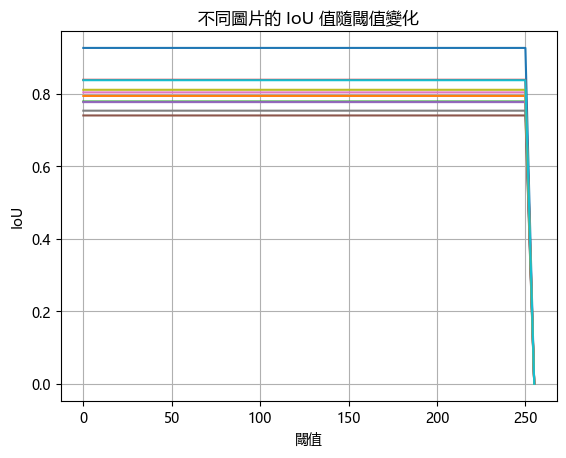

檔案: detect_251_Mask.png vs mix_1.png
最佳閾值: 0
最佳 IoU: 0.9271227330907627

檔案: detect_252_Mask.png vs mix_2.png
最佳閾值: 0
最佳 IoU: 0.794648465189205

檔案: detect_253_Mask.png vs mix_3.png
最佳閾值: 0
最佳 IoU: 0.7792567392641014

檔案: detect_254_Mask.png vs mix_4.png
最佳閾值: 0
最佳 IoU: 0.8391243300292669

檔案: detect_255_Mask.png vs mix_5.png
最佳閾值: 0
最佳 IoU: 0.7776184795109989

檔案: detect_256_Mask.png vs mix_6.png
最佳閾值: 0
最佳 IoU: 0.7407673281066683

檔案: detect_257_Mask.png vs mix_7.png
最佳閾值: 0
最佳 IoU: 0.8044299311462131

檔案: detect_258_Mask.png vs mix_8.png
最佳閾值: 0
最佳 IoU: 0.7539550872473191

檔案: detect_259_Mask.png vs mix_9.png
最佳閾值: 0
最佳 IoU: 0.8115730685405961

檔案: detect_260_Mask.png vs mix_10.png
最佳閾值: 0
最佳 IoU: 0.8380590388795822

全部圖片的平均 IoU: 0.8066555201004715


In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted

def calculate_iou(mask1, mask2):
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def find_best_threshold(mask_predict, mask_groundtruth):
    best_iou = 0
    best_threshold = 127  # 預設初始閾值
    ious = []

    # 測試不同閾值範圍 0-255
    for threshold in range(0, 256, 5):
        # 二值化處理
        _, mask_predict_bin = cv2.threshold(mask_predict, threshold, 255, cv2.THRESH_BINARY)
        _, mask_groundtruth_bin = cv2.threshold(mask_groundtruth, threshold, 255, cv2.THRESH_BINARY)
        
        # 計算 IoU
        iou = calculate_iou(mask_predict_bin, mask_groundtruth_bin)
        ious.append((threshold, iou))
        
        # 更新最佳閾值
        if iou > best_iou:
            best_iou = iou
            best_threshold = threshold

    return best_threshold, best_iou, ious

def process_folder_for_best_thresholds(predict_folder, groundtruth_folder):
    # 自然排序讀取檔案
    predict_files = natsorted([f for f in os.listdir(predict_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    # 檢查檔案數量是否一致
    if len(predict_files) != len(groundtruth_files):
        raise ValueError("預測資料夾和真實資料夾中的檔案數量不一致。")

    best_thresholds = []
    total_iou = 0
    for predict_file, groundtruth_file in zip(predict_files, groundtruth_files):
        predict_path = os.path.join(predict_folder, predict_file)
        groundtruth_path = os.path.join(groundtruth_folder, groundtruth_file)
        
        # 讀取並轉換為灰階影像
        mask_predict = cv2.imread(predict_path, cv2.IMREAD_GRAYSCALE)
        mask_groundtruth = cv2.imread(groundtruth_path, cv2.IMREAD_GRAYSCALE)
        
        if mask_predict is None or mask_groundtruth is None:
            print(f"無法讀取檔案: {predict_path} 或 {groundtruth_path}")
            continue
        
        # 計算最佳閾值和 IoU
        best_threshold, best_iou, ious = find_best_threshold(mask_predict, mask_groundtruth)
        best_thresholds.append((predict_file, groundtruth_file, best_threshold, best_iou))
        
        print(f"{predict_file} 與 {groundtruth_file} 的最佳閾值為 {best_threshold}，IoU 為 {best_iou}")

        # 累加 IoU 值
        total_iou += best_iou

        # 畫出每個檔案的 IoU-閾值變化圖
        thresholds = [x[0] for x in ious]
        ious_values = [x[1] for x in ious]
        plt.plot(thresholds, ious_values, label=f"{predict_file}")
    
    # 計算平均 IoU
    average_iou = total_iou / len(best_thresholds) if best_thresholds else 0

    # 顯示所有檔案的 IoU-閾值圖
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 設定中文字體
    plt.xlabel('閾值')
    plt.ylabel('IoU')
    plt.title('不同圖片的 IoU 值隨閾值變化')
    #plt.legend(loc="best")  # 顯示圖例
    plt.grid(True)
    plt.show()

    return best_thresholds, average_iou

# 預測集和真實集的資料夾路徑
predict_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2"
groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth"

# 計算每張圖片的最佳閾值和 IoU，並計算平均 IoU
best_thresholds, average_iou = process_folder_for_best_thresholds(predict_folder, groundtruth_folder)

# 輸出每對檔案的最佳閾值和 IoU
for predict_file, groundtruth_file, best_threshold, best_iou in best_thresholds:
    print(f"檔案: {predict_file} vs {groundtruth_file}")
    print(f"最佳閾值: {best_threshold}")
    print(f"最佳 IoU: {best_iou}\n")

# 輸出全部圖片的平均 IoU
print(f"全部圖片的平均 IoU: {average_iou}")


使用Optuna來優化參數  
使用的圖片為處理前

In [9]:
import os
import cv2
import numpy as np
from natsort import natsorted
import optuna
import matplotlib.pyplot as plt

def calculate_iou(pred_image, true_image):
    intersection = np.logical_and(pred_image, true_image).sum()
    union = np.logical_or(pred_image, true_image).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def process_image(image, kernel_shape='rect', kernel_size=10, iterations=1, flood_fill=False, multi_stage=False):
    if kernel_shape == 'rect':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
    elif kernel_shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    elif kernel_shape == 'circle':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    else:
        raise ValueError("不支持的結構元素形狀")
    
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    if multi_stage:
        small_kernel = np.ones((3, 3), np.uint8)
        closing = cv2.morphologyEx(closing, cv2.MORPH_OPEN, small_kernel)

    if flood_fill:
        h, w = closing.shape[:2]
        mask = np.zeros((h + 2, w + 2), np.uint8)
        cv2.floodFill(closing, mask, (0, 0), 255, loDiff=5, upDiff=5)

    return closing

def objective_a(trial):
    kernel_shape = trial.suggest_categorical('kernel_shape', ['rect', 'ellipse', 'circle'])
    kernel_size = trial.suggest_int('kernel_size', 5, 50)  # 擴大範圍
    iterations = trial.suggest_int('iterations', 1, 20)
    flood_fill = trial.suggest_categorical('flood_fill', [True, False])
    multi_stage = trial.suggest_categorical('multi_stage', [True, False])  # 新增多階段處理

    input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict"
    groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth"

    image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    total_iou = 0
    count = 0

    for image_file, gt_file in zip(image_files, groundtruth_files):
        input_path = os.path.join(input_folder, image_file)
        gt_path = os.path.join(groundtruth_folder, gt_file)

        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        true_image = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if image is None or true_image is None:
            continue

        processed_image = process_image(image, kernel_shape=kernel_shape, kernel_size=kernel_size, iterations=iterations, flood_fill=flood_fill, multi_stage=multi_stage)

        iou = calculate_iou(processed_image, true_image)
        total_iou += iou
        count += 1

    return -(total_iou / count) if count > 0 else 0

# 使用 Optuna 進行參數優化 A 組
study_a = optuna.create_study(direction='minimize')
study_a.optimize(objective_a, n_trials=200)  # 增加訓練次數

best_params_a = study_a.best_params
best_iou_a = -study_a.best_value
average_iou_a = -sum([objective_a(optuna.trial.Trial(study_a, i)) for i in range(len(study_a.trials))]) / len(study_a.trials)

print("A組最佳參數: ", best_params_a)
print("A組最佳 IOU: ", best_iou_a)
print("A組平均 IOU: ", average_iou_a)

[I 2024-10-17 10:20:17,040] A new study created in memory with name: no-name-5e87b1cf-65ec-4d84-bf0e-c5dbc63d41da
[I 2024-10-17 10:20:17,447] Trial 0 finished with value: -0.7529278883145936 and parameters: {'kernel_shape': 'circle', 'kernel_size': 17, 'iterations': 14, 'flood_fill': False, 'multi_stage': False}. Best is trial 0 with value: -0.7529278883145936.
[I 2024-10-17 10:20:20,260] Trial 1 finished with value: -0.7283899739583333 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 22, 'iterations': 16, 'flood_fill': False, 'multi_stage': True}. Best is trial 0 with value: -0.7529278883145936.
[I 2024-10-17 10:20:23,707] Trial 2 finished with value: -0.7392970581627554 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 34, 'iterations': 7, 'flood_fill': True, 'multi_stage': True}. Best is trial 0 with value: -0.7529278883145936.
[I 2024-10-17 10:20:24,083] Trial 3 finished with value: -0.7283899739583333 and parameters: {'kernel_shape': 'rect', 'kernel_size': 19, '

A組最佳參數:  {'kernel_shape': 'ellipse', 'kernel_size': 7, 'iterations': 5, 'flood_fill': True, 'multi_stage': True}
A組最佳 IOU:  0.813315729320885
A組平均 IOU:  0.8038650172968524


使用Optuna來優化參數  
使用圖片為處理後

In [13]:
import os
import numpy as np
import cv2
from natsort import natsorted
import optuna

def calculate_iou(pred_image, true_image):
    intersection = np.logical_and(pred_image, true_image).sum()
    union = np.logical_or(pred_image, true_image).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def process_image(image, kernel_shape='rect', kernel_size=10, iterations=1, flood_fill=False, multi_stage=False):
    # 定義結構元素的形狀
    if kernel_shape == 'rect':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
    elif kernel_shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    elif kernel_shape == 'circle':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    else:
        raise ValueError("不支持的結構元素形狀")

    # 開運算去除噪點
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # 閉運算填補孔洞
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    # 多階段處理
    if multi_stage:
        small_kernel = np.ones((3, 3), np.uint8)
        closing = cv2.morphologyEx(closing, cv2.MORPH_OPEN, small_kernel)

    # 可選洪水填充
    if flood_fill:
        h, w = closing.shape[:2]
        mask = np.zeros((h + 2, w + 2), np.uint8)
        cv2.floodFill(closing, mask, (0, 0), 255, loDiff=5, upDiff=5)

    return closing

def objective_b(trial):
    # 定義 Optuna 參數空間
    kernel_shape = trial.suggest_categorical('kernel_shape', ['rect', 'ellipse', 'circle'])
    kernel_size = trial.suggest_int('kernel_size', 5, 50)
    iterations = trial.suggest_int('iterations', 1, 20)
    flood_fill = trial.suggest_categorical('flood_fill', [True, False])
    multi_stage = trial.suggest_categorical('multi_stage', [True, False])

    input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2"
    groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth"

    # 自然排序讀取資料夾中的 PNG 檔案
    image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    total_iou = 0
    count = 0

    # 計算每個圖片的 IOU
    for image_file, gt_file in zip(image_files, groundtruth_files):
        input_path = os.path.join(input_folder, image_file)
        gt_path = os.path.join(groundtruth_folder, gt_file)

        # 讀取圖片
        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        true_image = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if image is None or true_image is None:
            continue

        # 使用 Optuna 參數進行處理
        processed_image = process_image(image, kernel_shape=kernel_shape, kernel_size=kernel_size, iterations=iterations, flood_fill=flood_fill, multi_stage=multi_stage)

        # 計算 IOU
        iou = calculate_iou(processed_image, true_image)
        total_iou += iou
        count += 1

    # 返回平均 IOU 的負值，用於 Optuna 的最小化目標
    return -(total_iou / count) if count > 0 else 0

def calculate_average_iou(best_params):
    input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2"
    groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth"

    # 自然排序讀取資料夾中的 PNG 檔案
    image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    total_iou = 0
    count = 0

    # 使用最佳參數進行圖片處理
    for image_file, gt_file in zip(image_files, groundtruth_files):
        input_path = os.path.join(input_folder, image_file)
        gt_path = os.path.join(groundtruth_folder, gt_file)

        # 讀取圖片
        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        true_image = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if image is None or true_image is None:
            continue

        # 使用最佳參數進行圖片處理
        processed_image = process_image(
            image, 
            kernel_shape=best_params['kernel_shape'], 
            kernel_size=best_params['kernel_size'], 
            iterations=best_params['iterations'], 
            flood_fill=best_params['flood_fill'], 
            multi_stage=best_params['multi_stage']
        )

        # 計算 IOU
        iou = calculate_iou(processed_image, true_image)
        total_iou += iou
        count += 1

    # 計算並返回平均 IOU
    return total_iou / count if count > 0 else 0

# 使用 Optuna 進行參數優化 B 組
study_b = optuna.create_study(direction='minimize')
study_b.optimize(objective_b, n_trials=200)

# 獲取最佳參數和 IOU
best_params_b = study_b.best_params
best_iou_b = -study_b.best_value
average_iou_b = calculate_average_iou(best_params_b)

# 輸出結果
print("B組最佳參數: ", best_params_b)
print("B組最佳 IOU: ", best_iou_b)
print("B組平均 IOU (使用最佳參數): ", average_iou_b)


[I 2024-10-17 11:01:10,336] A new study created in memory with name: no-name-ec0ca2d1-0612-488e-94cb-7bc962c44880
[I 2024-10-17 11:01:10,538] Trial 0 finished with value: -0.7979586964708963 and parameters: {'kernel_shape': 'circle', 'kernel_size': 15, 'iterations': 8, 'flood_fill': False, 'multi_stage': True}. Best is trial 0 with value: -0.7979586964708963.
[I 2024-10-17 11:01:10,818] Trial 1 finished with value: -0.7876763948833688 and parameters: {'kernel_shape': 'circle', 'kernel_size': 17, 'iterations': 9, 'flood_fill': False, 'multi_stage': True}. Best is trial 0 with value: -0.7979586964708963.
[I 2024-10-17 11:01:28,365] Trial 2 finished with value: -0.7283899739583333 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 48, 'iterations': 17, 'flood_fill': False, 'multi_stage': False}. Best is trial 0 with value: -0.7979586964708963.
[I 2024-10-17 11:01:28,596] Trial 3 finished with value: -0.7905442097290898 and parameters: {'kernel_shape': 'rect', 'kernel_size': 9, 'it

B組最佳參數:  {'kernel_shape': 'ellipse', 'kernel_size': 5, 'iterations': 9, 'flood_fill': True, 'multi_stage': True}
B組最佳 IOU:  0.8066855113131804
B組平均 IOU (使用最佳參數):  0.8066855113131804


使用Optuna來優化參數  
結合尋找閾值  
使用圖片為處理後  

In [18]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted
import optuna

def calculate_iou(mask1, mask2):
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def find_best_threshold(mask_predict, mask_groundtruth):
    best_iou = 0
    best_threshold = 127  # 預設初始閾值
    # 測試不同閾值範圍 0-255
    for threshold in range(0, 256, 5):
        # 二值化處理
        _, mask_predict_bin = cv2.threshold(mask_predict, threshold, 255, cv2.THRESH_BINARY)
        _, mask_groundtruth_bin = cv2.threshold(mask_groundtruth, threshold, 255, cv2.THRESH_BINARY)
        
        # 計算 IoU
        iou = calculate_iou(mask_predict_bin, mask_groundtruth_bin)
        # 更新最佳閾值
        if iou > best_iou:
            best_iou = iou
            best_threshold = threshold

    return best_threshold, best_iou

def process_image(image, kernel_shape='rect', kernel_size=10, iterations=1, flood_fill=False, multi_stage=False):
    # 定義結構元素的形狀
    if kernel_shape == 'rect':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
    elif kernel_shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    elif kernel_shape == 'circle':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    else:
        raise ValueError("不支持的結構元素形狀")

    # 開運算去除噪點
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # 閉運算填補孔洞
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    # 可選洪水填充
    if flood_fill:
        h, w = closing.shape[:2]
        mask = np.zeros((h + 2, w + 2), np.uint8)
        cv2.floodFill(closing, mask, (0, 0), 255, loDiff=5, upDiff=5)

    return closing

def objective_b(trial):
    # 定義 Optuna 參數空間
    kernel_shape = trial.suggest_categorical('kernel_shape', ['rect', 'ellipse', 'circle'])
    kernel_size = trial.suggest_int('kernel_size', 5, 50)
    iterations = trial.suggest_int('iterations', 1, 20)
    flood_fill = trial.suggest_categorical('flood_fill', [True, False])
    multi_stage = trial.suggest_categorical('multi_stage', [True, False])

    input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2"
    groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth"

    # 自然排序讀取資料夾中的 PNG 檔案
    image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    total_iou = 0
    count = 0

    # 計算每個圖片的 IOU
    for image_file, gt_file in zip(image_files, groundtruth_files):
        input_path = os.path.join(input_folder, image_file)
        gt_path = os.path.join(groundtruth_folder, gt_file)

        # 讀取圖片
        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        true_image = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if image is None or true_image is None:
            continue

        # 使用 Optuna 參數進行處理
        processed_image = process_image(image, kernel_shape=kernel_shape, kernel_size=kernel_size, iterations=iterations, flood_fill=flood_fill, multi_stage=multi_stage)

        # 計算最佳閾值和 IoU
        best_threshold, iou = find_best_threshold(processed_image, true_image)
        total_iou += iou
        count += 1

    # 返回平均 IOU 的負值，用於 Optuna 的最小化目標
    return -(total_iou / count) if count > 0 else 0

# 使用 Optuna 進行參數優化 B 組
study_b = optuna.create_study(direction='minimize')
study_b.optimize(objective_b, n_trials=200)

# 獲取最佳參數和 IOU
best_params_b = study_b.best_params
best_iou_b = -study_b.best_value
average_iou_b = calculate_average_iou(best_params_b)

# 輸出結果
print("B組最佳參數: ", best_params_b)
print("B組最佳 IOU: ", best_iou_b)
print("B組平均 IOU (使用最佳參數): ", average_iou_b)

[I 2024-10-17 14:14:56,502] A new study created in memory with name: no-name-e3f121cb-7ca2-49c6-bc9f-2b80492511c7
[I 2024-10-17 14:15:03,392] Trial 0 finished with value: -0.7320738394717684 and parameters: {'kernel_shape': 'circle', 'kernel_size': 19, 'iterations': 19, 'flood_fill': True, 'multi_stage': True}. Best is trial 0 with value: -0.7320738394717684.
[I 2024-10-17 14:15:14,887] Trial 1 finished with value: -0.7283899739583333 and parameters: {'kernel_shape': 'rect', 'kernel_size': 42, 'iterations': 8, 'flood_fill': True, 'multi_stage': True}. Best is trial 0 with value: -0.7320738394717684.
[I 2024-10-17 14:15:21,856] Trial 2 finished with value: -0.7283899739583333 and parameters: {'kernel_shape': 'circle', 'kernel_size': 37, 'iterations': 11, 'flood_fill': True, 'multi_stage': False}. Best is trial 0 with value: -0.7320738394717684.
[I 2024-10-17 14:15:26,779] Trial 3 finished with value: -0.7984579985965874 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 6, 'iter

B組最佳參數:  {'kernel_shape': 'ellipse', 'kernel_size': 45, 'iterations': 1, 'flood_fill': True, 'multi_stage': True}
B組最佳 IOU:  0.8067088858892364
B組平均 IOU (使用最佳參數):  0.8067088858892364


使用Optuna優化參數  
結合尋找閾值  
新增 高斯模糊、邊緣檢測 

In [19]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted
import optuna

def calculate_iou(mask1, mask2):
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def find_best_threshold(mask_predict, mask_groundtruth):
    best_iou = 0
    best_threshold = 127  # 預設初始閾值
    for threshold in range(0, 256, 5):
        _, mask_predict_bin = cv2.threshold(mask_predict, threshold, 255, cv2.THRESH_BINARY)
        _, mask_groundtruth_bin = cv2.threshold(mask_groundtruth, threshold, 255, cv2.THRESH_BINARY)
        iou = calculate_iou(mask_predict_bin, mask_groundtruth_bin)
        if iou > best_iou:
            best_iou = iou
            best_threshold = threshold
    return best_threshold, best_iou

def process_image(image, kernel_shape='rect', kernel_size=10, iterations=1, flood_fill=False, multi_stage=False, apply_blur=False, edge_detection=False):
    # 定義結構元素的形狀
    if kernel_shape == 'rect':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
    elif kernel_shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    elif kernel_shape == 'circle':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    else:
        raise ValueError("不支持的結構元素形狀")

    # 可選高斯模糊
    if apply_blur:
        image = cv2.GaussianBlur(image, (5, 5), 0)

    # 開運算去除噪點
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # 閉運算填補孔洞
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    # 可選邊緣檢測（Canny）
    if edge_detection:
        closing = cv2.Canny(closing, 100, 200)

    # 可選洪水填充
    if flood_fill:
        h, w = closing.shape[:2]
        mask = np.zeros((h + 2, w + 2), np.uint8)
        cv2.floodFill(closing, mask, (0, 0), 255, loDiff=5, upDiff=5)

    return closing

def objective_b(trial):
    # 定義 Optuna 參數空間
    kernel_shape = trial.suggest_categorical('kernel_shape', ['rect', 'ellipse', 'circle'])
    kernel_size = trial.suggest_int('kernel_size', 5, 50)
    iterations = trial.suggest_int('iterations', 1, 20)
    flood_fill = trial.suggest_categorical('flood_fill', [True, False])
    multi_stage = trial.suggest_categorical('multi_stage', [True, False])
    apply_blur = trial.suggest_categorical('apply_blur', [True, False])
    edge_detection = trial.suggest_categorical('edge_detection', [True, False])

    input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_predict_2"
    groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\300_groundtruth"

    # 自然排序讀取資料夾中的 PNG 檔案
    image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    total_iou = 0
    count = 0

    # 計算每個圖片的 IOU
    for image_file, gt_file in zip(image_files, groundtruth_files):
        input_path = os.path.join(input_folder, image_file)
        gt_path = os.path.join(groundtruth_folder, gt_file)

        # 讀取圖片
        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        true_image = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if image is None or true_image is None:
            continue

        # 使用 Optuna 參數進行處理
        processed_image = process_image(image, 
                                        kernel_shape=kernel_shape, 
                                        kernel_size=kernel_size, 
                                        iterations=iterations, 
                                        flood_fill=flood_fill, 
                                        multi_stage=multi_stage, 
                                        apply_blur=apply_blur, 
                                        edge_detection=edge_detection)

        # 計算最佳閾值和 IoU
        best_threshold, iou = find_best_threshold(processed_image, true_image)
        total_iou += iou
        count += 1

    # 返回平均 IOU 的負值，用於 Optuna 的最小化目標
    return -(total_iou / count) if count > 0 else 0

# 使用 Optuna 進行參數優化 B 組
study_b = optuna.create_study(direction='minimize')
study_b.optimize(objective_b, n_trials=200)

# 獲取最佳參數和 IOU
best_params_b = study_b.best_params
best_iou_b = -study_b.best_value
average_iou_b = calculate_average_iou(best_params_b)

# 輸出結果
print("B組最佳參數: ", best_params_b)
print("B組最佳 IOU: ", best_iou_b)
print("B組平均 IOU (使用最佳參數): ", average_iou_b)


[I 2024-10-17 14:34:58,438] A new study created in memory with name: no-name-54134330-9d1b-4aad-96a7-369da2ef5892
[I 2024-10-17 14:35:07,040] Trial 0 finished with value: -0.0 and parameters: {'kernel_shape': 'rect', 'kernel_size': 19, 'iterations': 18, 'flood_fill': False, 'multi_stage': False, 'apply_blur': False, 'edge_detection': True}. Best is trial 0 with value: -0.0.
[I 2024-10-17 14:35:15,354] Trial 1 finished with value: -0.7283899739583333 and parameters: {'kernel_shape': 'circle', 'kernel_size': 50, 'iterations': 17, 'flood_fill': False, 'multi_stage': True, 'apply_blur': True, 'edge_detection': False}. Best is trial 1 with value: -0.7283899739583333.
[I 2024-10-17 14:35:42,193] Trial 2 finished with value: -0.7283899739583333 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 49, 'iterations': 18, 'flood_fill': True, 'multi_stage': True, 'apply_blur': False, 'edge_detection': True}. Best is trial 1 with value: -0.7283899739583333.
[I 2024-10-17 14:35:47,967] Trial 3

B組最佳參數:  {'kernel_shape': 'ellipse', 'kernel_size': 7, 'iterations': 5, 'flood_fill': False, 'multi_stage': False, 'apply_blur': True, 'edge_detection': False}
B組最佳 IOU:  0.8073309211250995
B組平均 IOU (使用最佳參數):  0.8066786239040766


# 計算img-IOU

計算img-IOU

mask_caries-0.845815-33-1214_1_2022041830.png 與 caries-0.845815-33-1214_1_2022041830_mask.png 的最佳閾值為 0，IoU 為 0.5988883162054991
mask_caries-0.6741573-260-760_1_2022052768.png 與 caries-0.6741573-260-760_1_2022052768_mask.png 的最佳閾值為 0，IoU 為 0.7841533781784746
mask_caries-0.8304498-273-734_1_2022041847.png 與 caries-0.8304498-273-734_1_2022041847_mask.png 的最佳閾值為 0，IoU 為 0.8342335630471224
mask_caries-0.8421053-22-1236_0_2022052776.png 與 caries-0.8421053-22-1236_0_2022052776_mask.png 的最佳閾值為 0，IoU 為 0.7105575365092682
mask_caries-0.8480566-33-1214_0_2022042506.png 與 caries-0.8480566-33-1214_0_2022042506_mask.png 的最佳閾值為 0，IoU 為 0.7408899746218703
mask_caries-0.8510638-268-743_1_2022060601150.png 與 caries-0.8510638-268-743_1_2022060601150_mask.png 的最佳閾值為 0，IoU 為 0.9766560464780114
mask_caries-0.8510638-268-743_1_2022060601151.png 與 caries-0.8510638-268-743_1_2022060601151_mask.png 的最佳閾值為 0，IoU 為 0.9508550728395382
mask_caries-0.8510638-270-740_1_2022012069.png 與 caries-0.8510638-270-740_1_2022

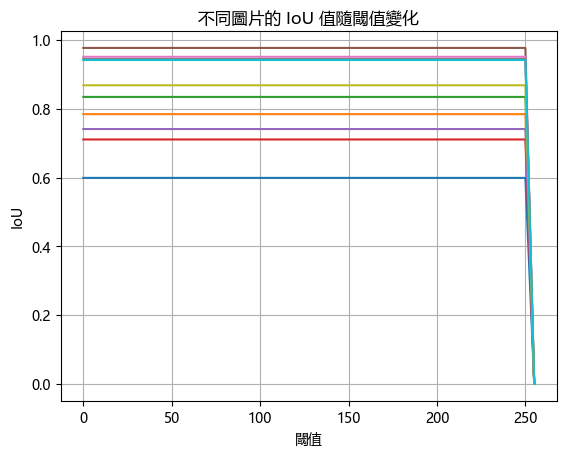

檔案: mask_caries-0.845815-33-1214_1_2022041830.png vs caries-0.845815-33-1214_1_2022041830_mask.png
最佳閾值: 0
最佳 IoU: 0.5988883162054991

檔案: mask_caries-0.6741573-260-760_1_2022052768.png vs caries-0.6741573-260-760_1_2022052768_mask.png
最佳閾值: 0
最佳 IoU: 0.7841533781784746

檔案: mask_caries-0.8304498-273-734_1_2022041847.png vs caries-0.8304498-273-734_1_2022041847_mask.png
最佳閾值: 0
最佳 IoU: 0.8342335630471224

檔案: mask_caries-0.8421053-22-1236_0_2022052776.png vs caries-0.8421053-22-1236_0_2022052776_mask.png
最佳閾值: 0
最佳 IoU: 0.7105575365092682

檔案: mask_caries-0.8480566-33-1214_0_2022042506.png vs caries-0.8480566-33-1214_0_2022042506_mask.png
最佳閾值: 0
最佳 IoU: 0.7408899746218703

檔案: mask_caries-0.8510638-268-743_1_2022060601150.png vs caries-0.8510638-268-743_1_2022060601150_mask.png
最佳閾值: 0
最佳 IoU: 0.9766560464780114

檔案: mask_caries-0.8510638-268-743_1_2022060601151.png vs caries-0.8510638-268-743_1_2022060601151_mask.png
最佳閾值: 0
最佳 IoU: 0.9508550728395382

檔案: mask_caries-0.8510638-270-7

In [20]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted

def calculate_iou(mask1, mask2):
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def find_best_threshold(mask_predict, mask_groundtruth):
    best_iou = 0
    best_threshold = 127  # 預設初始閾值
    ious = []

    # 測試不同閾值範圍 0-255
    for threshold in range(0, 256, 5):
        # 二值化處理
        _, mask_predict_bin = cv2.threshold(mask_predict, threshold, 255, cv2.THRESH_BINARY)
        _, mask_groundtruth_bin = cv2.threshold(mask_groundtruth, threshold, 255, cv2.THRESH_BINARY)
        
        # 計算 IoU
        iou = calculate_iou(mask_predict_bin, mask_groundtruth_bin)
        ious.append((threshold, iou))
        
        # 更新最佳閾值
        if iou > best_iou:
            best_iou = iou
            best_threshold = threshold

    return best_threshold, best_iou, ious

def process_folder_for_best_thresholds(predict_folder, groundtruth_folder):
    # 自然排序讀取檔案
    predict_files = natsorted([f for f in os.listdir(predict_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    # 檢查檔案數量是否一致
    if len(predict_files) != len(groundtruth_files):
        raise ValueError("預測資料夾和真實資料夾中的檔案數量不一致。")

    best_thresholds = []
    total_iou = 0
    for predict_file, groundtruth_file in zip(predict_files, groundtruth_files):
        predict_path = os.path.join(predict_folder, predict_file)
        groundtruth_path = os.path.join(groundtruth_folder, groundtruth_file)
        
        # 讀取並轉換為灰階影像
        mask_predict = cv2.imread(predict_path, cv2.IMREAD_GRAYSCALE)
        mask_groundtruth = cv2.imread(groundtruth_path, cv2.IMREAD_GRAYSCALE)
        
        if mask_predict is None or mask_groundtruth is None:
            print(f"無法讀取檔案: {predict_path} 或 {groundtruth_path}")
            continue
        
        # 計算最佳閾值和 IoU
        best_threshold, best_iou, ious = find_best_threshold(mask_predict, mask_groundtruth)
        best_thresholds.append((predict_file, groundtruth_file, best_threshold, best_iou))
        
        print(f"{predict_file} 與 {groundtruth_file} 的最佳閾值為 {best_threshold}，IoU 為 {best_iou}")

        # 累加 IoU 值
        total_iou += best_iou

        # 畫出每個檔案的 IoU-閾值變化圖
        thresholds = [x[0] for x in ious]
        ious_values = [x[1] for x in ious]
        plt.plot(thresholds, ious_values, label=f"{predict_file}")
    
    # 計算平均 IoU
    average_iou = total_iou / len(best_thresholds) if best_thresholds else 0

    # 顯示所有檔案的 IoU-閾值圖
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 設定中文字體
    plt.xlabel('閾值')
    plt.ylabel('IoU')
    plt.title('不同圖片的 IoU 值隨閾值變化')
    #plt.legend(loc="best")  # 顯示圖例
    plt.grid(True)
    plt.show()

    return best_thresholds, average_iou

# 預測集和真實集的資料夾路徑
predict_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\predict"
groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\groundtruth"

# 計算每張圖片的最佳閾值和 IoU，並計算平均 IoU
best_thresholds, average_iou = process_folder_for_best_thresholds(predict_folder, groundtruth_folder)

# 輸出每對檔案的最佳閾值和 IoU
for predict_file, groundtruth_file, best_threshold, best_iou in best_thresholds:
    print(f"檔案: {predict_file} vs {groundtruth_file}")
    print(f"最佳閾值: {best_threshold}")
    print(f"最佳 IoU: {best_iou}\n")

# 輸出全部圖片的平均 IoU
print(f"全部圖片的平均 IoU: {average_iou}")


使用Optuna來優化參數

In [24]:
import os
import cv2
import numpy as np
from natsort import natsorted
import optuna
import matplotlib.pyplot as plt

def calculate_iou(pred_image, true_image):
    intersection = np.logical_and(pred_image, true_image).sum()
    union = np.logical_or(pred_image, true_image).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def process_image(image, kernel_shape='rect', kernel_size=10, iterations=1, flood_fill=False, multi_stage=False):
    if kernel_shape == 'rect':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
    elif kernel_shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    elif kernel_shape == 'circle':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    else:
        raise ValueError("不支持的結構元素形狀")
    
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    if multi_stage:
        small_kernel = np.ones((3, 3), np.uint8)
        closing = cv2.morphologyEx(closing, cv2.MORPH_OPEN, small_kernel)

    if flood_fill:
        h, w = closing.shape[:2]
        mask = np.zeros((h + 2, w + 2), np.uint8)
        cv2.floodFill(closing, mask, (0, 0), 255, loDiff=5, upDiff=5)

    return closing

def objective_a(trial):
    kernel_shape = trial.suggest_categorical('kernel_shape', ['rect', 'ellipse', 'circle'])
    kernel_size = trial.suggest_int('kernel_size', 5, 50)  # 擴大範圍
    iterations = trial.suggest_int('iterations', 1, 20)
    flood_fill = trial.suggest_categorical('flood_fill', [True, False])
    # multi_stage = trial.suggest_categorical('multi_stage', [True, False])  # 新增多階段處理
    multi_stage = True


    input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\predict"
    groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\groundtruth"

    image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    total_iou = 0
    count = 0

    for image_file, gt_file in zip(image_files, groundtruth_files):
        input_path = os.path.join(input_folder, image_file)
        gt_path = os.path.join(groundtruth_folder, gt_file)

        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        true_image = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if image is None or true_image is None:
            continue

        processed_image = process_image(image, kernel_shape=kernel_shape, kernel_size=kernel_size, iterations=iterations, flood_fill=flood_fill, multi_stage=multi_stage)

        iou = calculate_iou(processed_image, true_image)
        total_iou += iou
        count += 1

    return -(total_iou / count) if count > 0 else 0

# 使用 Optuna 進行參數優化 A 組
study_a = optuna.create_study(direction='minimize')
study_a.optimize(objective_a, n_trials=200)  # 增加訓練次數

best_params_a = study_a.best_params
best_iou_a = -study_a.best_value
average_iou_a = -sum([objective_a(optuna.trial.Trial(study_a, i)) for i in range(len(study_a.trials))]) / len(study_a.trials)

print("最佳參數: ", best_params_a)
print("最佳 IOU: ", best_iou_a)
print("平均 IOU: ", average_iou_a)

[I 2024-10-17 16:28:38,126] A new study created in memory with name: no-name-4dab6e38-95fa-43aa-975f-7f1fd02c8889
[I 2024-10-17 16:28:38,476] Trial 0 finished with value: -0.5666528146677116 and parameters: {'kernel_shape': 'rect', 'kernel_size': 28, 'iterations': 12, 'flood_fill': True}. Best is trial 0 with value: -0.5666528146677116.
[I 2024-10-17 16:28:43,296] Trial 1 finished with value: -0.8249577276285975 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 42, 'iterations': 8, 'flood_fill': False}. Best is trial 1 with value: -0.8249577276285975.
[I 2024-10-17 16:28:45,953] Trial 2 finished with value: -0.5139720175272349 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 39, 'iterations': 3, 'flood_fill': True}. Best is trial 1 with value: -0.8249577276285975.
[I 2024-10-17 16:28:46,812] Trial 3 finished with value: -0.5124737687887322 and parameters: {'kernel_shape': 'circle', 'kernel_size': 46, 'iterations': 6, 'flood_fill': True}. Best is trial 1 with value: -

最佳參數:  {'kernel_shape': 'ellipse', 'kernel_size': 17, 'iterations': 20, 'flood_fill': False}
最佳 IOU:  0.8577800583498668
平均 IOU:  0.8083627224211353


使用Optuna來優化參數  
結合尋找閾值

In [22]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted
import optuna

def calculate_iou(mask1, mask2):
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def find_best_threshold(mask_predict, mask_groundtruth):
    best_iou = 0
    best_threshold = 127  # 預設初始閾值
    # 測試不同閾值範圍 0-255
    for threshold in range(0, 256, 5):
        # 二值化處理
        _, mask_predict_bin = cv2.threshold(mask_predict, threshold, 255, cv2.THRESH_BINARY)
        _, mask_groundtruth_bin = cv2.threshold(mask_groundtruth, threshold, 255, cv2.THRESH_BINARY)
        
        # 計算 IoU
        iou = calculate_iou(mask_predict_bin, mask_groundtruth_bin)
        # 更新最佳閾值
        if iou > best_iou:
            best_iou = iou
            best_threshold = threshold

    return best_threshold, best_iou

def process_image(image, kernel_shape='rect', kernel_size=10, iterations=1, flood_fill=False, multi_stage=False):
    # 定義結構元素的形狀
    if kernel_shape == 'rect':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
    elif kernel_shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    elif kernel_shape == 'circle':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    else:
        raise ValueError("不支持的結構元素形狀")

    # 開運算去除噪點
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # 閉運算填補孔洞
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    # 可選洪水填充
    if flood_fill:
        h, w = closing.shape[:2]
        mask = np.zeros((h + 2, w + 2), np.uint8)
        cv2.floodFill(closing, mask, (0, 0), 255, loDiff=5, upDiff=5)

    return closing

def objective_b(trial):
    # 定義 Optuna 參數空間
    kernel_shape = trial.suggest_categorical('kernel_shape', ['rect', 'ellipse', 'circle'])
    kernel_size = trial.suggest_int('kernel_size', 5, 50)
    iterations = trial.suggest_int('iterations', 1, 20)
    flood_fill = trial.suggest_categorical('flood_fill', [True, False])
    multi_stage = trial.suggest_categorical('multi_stage', [True, False])

    input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\predict"
    groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\groundtruth"

    # 自然排序讀取資料夾中的 PNG 檔案
    image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    total_iou = 0
    count = 0

    # 計算每個圖片的 IOU
    for image_file, gt_file in zip(image_files, groundtruth_files):
        input_path = os.path.join(input_folder, image_file)
        gt_path = os.path.join(groundtruth_folder, gt_file)

        # 讀取圖片
        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        true_image = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if image is None or true_image is None:
            continue

        # 使用 Optuna 參數進行處理
        processed_image = process_image(image, kernel_shape=kernel_shape, kernel_size=kernel_size, iterations=iterations, flood_fill=flood_fill, multi_stage=multi_stage)

        # 計算最佳閾值和 IoU
        best_threshold, iou = find_best_threshold(processed_image, true_image)
        total_iou += iou
        count += 1

    # 返回平均 IOU 的負值，用於 Optuna 的最小化目標
    return -(total_iou / count) if count > 0 else 0

# 使用 Optuna 進行參數優化 B 組
study_b = optuna.create_study(direction='minimize')
study_b.optimize(objective_b, n_trials=200)

# 獲取最佳參數和 IOU
best_params_b = study_b.best_params
best_iou_b = -study_b.best_value
average_iou_b = calculate_average_iou(best_params_b)

# 輸出結果
print("最佳參數: ", best_params_b)
print("最佳 IOU: ", best_iou_b)
print("平均 IOU (使用最佳參數): ", average_iou_b)

[I 2024-10-17 15:37:04,057] A new study created in memory with name: no-name-2c9db4d6-b192-4b37-a9a3-ccb275517547
[I 2024-10-17 15:37:12,877] Trial 0 finished with value: -0.8270660807457835 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 34, 'iterations': 12, 'flood_fill': False, 'multi_stage': True}. Best is trial 0 with value: -0.8270660807457835.
[I 2024-10-17 15:37:21,195] Trial 1 finished with value: -0.5119417714982417 and parameters: {'kernel_shape': 'circle', 'kernel_size': 11, 'iterations': 18, 'flood_fill': True, 'multi_stage': False}. Best is trial 0 with value: -0.8270660807457835.
[I 2024-10-17 15:37:27,602] Trial 2 finished with value: -0.628162152667318 and parameters: {'kernel_shape': 'circle', 'kernel_size': 48, 'iterations': 17, 'flood_fill': False, 'multi_stage': True}. Best is trial 0 with value: -0.8270660807457835.
[I 2024-10-17 15:37:34,257] Trial 3 finished with value: -0.8449216990211393 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 23,

B組最佳參數:  {'kernel_shape': 'ellipse', 'kernel_size': 17, 'iterations': 20, 'flood_fill': False, 'multi_stage': True}
B組最佳 IOU:  0.8577816747158178
B組平均 IOU (使用最佳參數):  0.7283899739583333


使用Optuna來優化參數  
結合尋找閾值  
新增 高斯模糊、邊緣檢測  

In [23]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from natsort import natsorted
import optuna

def calculate_iou(mask1, mask2):
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def find_best_threshold(mask_predict, mask_groundtruth):
    best_iou = 0
    best_threshold = 127  # 預設初始閾值
    for threshold in range(0, 256, 5):
        _, mask_predict_bin = cv2.threshold(mask_predict, threshold, 255, cv2.THRESH_BINARY)
        _, mask_groundtruth_bin = cv2.threshold(mask_groundtruth, threshold, 255, cv2.THRESH_BINARY)
        iou = calculate_iou(mask_predict_bin, mask_groundtruth_bin)
        if iou > best_iou:
            best_iou = iou
            best_threshold = threshold
    return best_threshold, best_iou

def process_image(image, kernel_shape='rect', kernel_size=10, iterations=1, flood_fill=False, multi_stage=False, apply_blur=False, edge_detection=False):
    # 定義結構元素的形狀
    if kernel_shape == 'rect':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
    elif kernel_shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    elif kernel_shape == 'circle':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    else:
        raise ValueError("不支持的結構元素形狀")

    # 可選高斯模糊
    if apply_blur:
        image = cv2.GaussianBlur(image, (5, 5), 0)

    # 開運算去除噪點
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # 閉運算填補孔洞
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    # 可選邊緣檢測（Canny）
    if edge_detection:
        closing = cv2.Canny(closing, 100, 200)

    # 可選洪水填充
    if flood_fill:
        h, w = closing.shape[:2]
        mask = np.zeros((h + 2, w + 2), np.uint8)
        cv2.floodFill(closing, mask, (0, 0), 255, loDiff=5, upDiff=5)

    return closing

def objective_b(trial):
    # 定義 Optuna 參數空間
    kernel_shape = trial.suggest_categorical('kernel_shape', ['rect', 'ellipse', 'circle'])
    kernel_size = trial.suggest_int('kernel_size', 5, 50)
    iterations = trial.suggest_int('iterations', 1, 20)
    flood_fill = trial.suggest_categorical('flood_fill', [True, False])
    multi_stage = trial.suggest_categorical('multi_stage', [True, False])
    apply_blur = trial.suggest_categorical('apply_blur', [True, False])
    edge_detection = trial.suggest_categorical('edge_detection', [True, False])

    input_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\predict"
    groundtruth_folder = r"C:\Users\SSTek\Desktop\LianChia\task\v4.42\groundtruth"

    # 自然排序讀取資料夾中的 PNG 檔案
    image_files = natsorted([f for f in os.listdir(input_folder) if f.endswith('.png')])
    groundtruth_files = natsorted([f for f in os.listdir(groundtruth_folder) if f.endswith('.png')])

    total_iou = 0
    count = 0

    # 計算每個圖片的 IOU
    for image_file, gt_file in zip(image_files, groundtruth_files):
        input_path = os.path.join(input_folder, image_file)
        gt_path = os.path.join(groundtruth_folder, gt_file)

        # 讀取圖片
        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        true_image = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if image is None or true_image is None:
            continue

        # 使用 Optuna 參數進行處理
        processed_image = process_image(image, 
                                        kernel_shape=kernel_shape, 
                                        kernel_size=kernel_size, 
                                        iterations=iterations, 
                                        flood_fill=flood_fill, 
                                        multi_stage=multi_stage, 
                                        apply_blur=apply_blur, 
                                        edge_detection=edge_detection)

        # 計算最佳閾值和 IoU
        best_threshold, iou = find_best_threshold(processed_image, true_image)
        total_iou += iou
        count += 1

    # 返回平均 IOU 的負值，用於 Optuna 的最小化目標
    return -(total_iou / count) if count > 0 else 0

# 使用 Optuna 進行參數優化 B 組
study_b = optuna.create_study(direction='minimize')
study_b.optimize(objective_b, n_trials=200)

# 獲取最佳參數和 IOU
best_params_b = study_b.best_params
best_iou_b = -study_b.best_value
average_iou_b = calculate_average_iou(best_params_b)

# 輸出結果
print("最佳參數: ", best_params_b)
print("最佳 IOU: ", best_iou_b)
print("平均 IOU (使用最佳參數): ", average_iou_b)


[I 2024-10-17 15:58:50,006] A new study created in memory with name: no-name-bec5ae58-8033-445d-83f3-f09cfa1bc32c
[I 2024-10-17 15:58:59,227] Trial 0 finished with value: -0.8215929551732307 and parameters: {'kernel_shape': 'ellipse', 'kernel_size': 28, 'iterations': 1, 'flood_fill': False, 'multi_stage': False, 'apply_blur': False, 'edge_detection': False}. Best is trial 0 with value: -0.8215929551732307.
[I 2024-10-17 15:59:08,248] Trial 1 finished with value: -0.0027543171141739065 and parameters: {'kernel_shape': 'circle', 'kernel_size': 23, 'iterations': 12, 'flood_fill': False, 'multi_stage': True, 'apply_blur': False, 'edge_detection': True}. Best is trial 0 with value: -0.8215929551732307.
[I 2024-10-17 15:59:14,137] Trial 2 finished with value: -0.5288778950781855 and parameters: {'kernel_shape': 'circle', 'kernel_size': 48, 'iterations': 7, 'flood_fill': True, 'multi_stage': True, 'apply_blur': True, 'edge_detection': False}. Best is trial 0 with value: -0.8215929551732307.
[

最佳參數:  {'kernel_shape': 'circle', 'kernel_size': 11, 'iterations': 19, 'flood_fill': False, 'multi_stage': True, 'apply_blur': True, 'edge_detection': False}
最佳 IOU:  0.8579678311681096
平均 IOU (使用最佳參數):  0.7659951934394204
